In [1]:
import numpy as np
import matplotlib.pyplot as plt
import coordinate_transforms
import importlib
importlib.reload(coordinate_transforms)
import plotting

In [20]:
telescope_lat_deg=39.25
za_cutoff_deg = 70

resolution_deg = .1
ras = np.linspace(0, 2*np.pi, num=int(2*np.pi / np.deg2rad(resolution_deg)))
decs = np.linspace(-np.pi/2, np.pi/2, num=int(np.pi / np.deg2rad(resolution_deg)))
ras_mesh, decs_mesh = np.meshgrid(ras, decs)
ras_mesh = ras_mesh.flatten()
decs_mesh = decs_mesh.flatten()

zenith_angles = np.arccos(
    np.cos(np.deg2rad(telescope_lat_deg)) * np.cos(decs_mesh) * np.cos(ras_mesh)
    + np.sin(np.deg2rad(telescope_lat_deg)) * np.sin(decs_mesh)
)

keep_inds = np.where(np.rad2deg(zenith_angles) < za_cutoff_deg)[0]
ras_mesh = ras_mesh[keep_inds]
decs_mesh = decs_mesh[keep_inds]
integral_value = np.sum(np.cos(decs_mesh)**2 * np.cos(ras_mesh)) / np.sum(np.cos(decs_mesh))
print(integral_value)

0.5198287705286742


In [21]:
np.rad2deg(np.arccos(integral_value))  # Optimal phase center declination

58.67923353522443

In [ ]:
np.pi/2

In [ ]:
for ra in ras:
    for dec in decs:
        l, m = ra_dec_to_l_m(
    source_dec_rad=None,
    source_ra_offset_rad=None,  # Difference between the source RA and zenith RA
    zenith_dec_rad=None,      

In [56]:
za_vals = np.arange(0, 90, 1) + 0.5
az_vals = np.arange(0, 370, 1) + 0.5
az_array, za_array = np.meshgrid(az_vals, za_vals)
ra_vals, dec_vals = coordinate_transforms.az_za_to_ra_dec(
    az_array,  # Units degrees
    za_array,  # Units degrees
    0,  # Units hours (RA of zenith)
    telescope_lat_deg,  # Units degrees
)
l_dot = np.cos(np.deg2rad(dec_vals)) * np.cos(ra_vals/12*np.pi)
m_dot = (
    -np.sin(np.deg2rad(telescope_lat_deg))
    * np.cos(np.deg2rad(dec_vals))
    * np.sin(ra_vals / 12 * np.pi)
)

In [54]:
l_dot

array([[ 0.77431498,  0.77421863,  0.77412232, ...,  0.77364248,
         0.77354705,  0.77345188],
       [ 0.77398275,  0.77369373,  0.77340484, ...,  0.77196546,
         0.77167921,  0.77139371],
       [ 0.77341476,  0.77293316,  0.77245177, ...,  0.77005329,
         0.7695763 ,  0.76910055],
       ...,
       [ 0.02826146,  0.01722649,  0.00620107, ..., -0.04834323,
        -0.05905074, -0.06966446],
       [ 0.01475126,  0.0037134 , -0.00731085, ..., -0.06178096,
        -0.072459  , -0.08303823],
       [ 0.0012366 , -0.00980059, -0.02081987, ..., -0.07519414,
        -0.08583797, -0.09637784]])

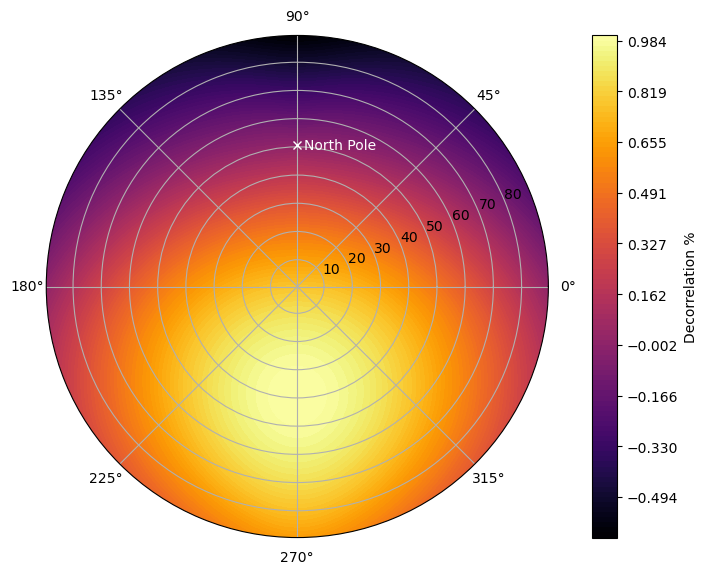

In [55]:
plotting.polar_contour_plot(
    l_dot,  # Convert to percentage
    np.deg2rad(az_vals),  # Units radians
    za_vals,  # Units degrees
    vmin=np.min(l_dot),
    vmax=np.max(l_dot),
    ncontours=100,
    title="",
    show=True,
    mark_north_pole=True,
)

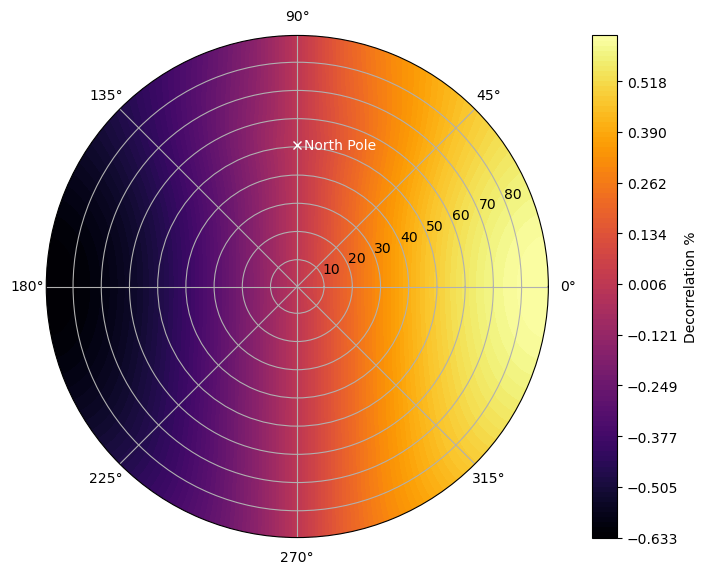

In [57]:
plotting.polar_contour_plot(
    m_dot,  # Convert to percentage
    np.deg2rad(az_vals),  # Units radians
    za_vals,  # Units degrees
    vmin=np.min(m_dot),
    vmax=np.max(m_dot),
    ncontours=100,
    title="",
    show=True,
    mark_north_pole=True,
)